In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
HR_data = pd.read_csv("HR_data.csv")

In [ ]:
# Create a copy of the Dataset
clean = HR_data.copy()

##**Cleaning the Data:**

In [ ]:
# Drop columns that are not relevant 
clean = clean.drop(['Over18', 'EmployeeCount','EmployeeNumber','DailyRate','StandardHours','HourlyRate','MonthlyRate'], axis = 1)

**Check for filtering out values at max age — attrition due to retirement:**

In [ ]:
print('Max age of employees is: ',clean['Age'].max())
retEmp = clean.loc[clean['Age'] == clean['Age'].max()]
print('Number of employees at max age are:', retEmp.shape[0])

Max age of employees is:  60
Number of employees at max age are: 5


In [ ]:
#checking attrition value for these employees
retEmp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60,No,Travel_Rarely,Research & Development,7,3,Life Sciences,549,1,Female,...,3,4,0,33,5,1,29,8,11,10
427,60,No,Travel_Frequently,Sales,28,3,Marketing,573,3,Female,...,3,4,0,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,Sales,16,4,Marketing,732,1,Male,...,3,4,0,10,1,3,2,2,2,2
879,60,No,Travel_Rarely,Sales,7,4,Marketing,1233,2,Male,...,3,2,1,12,3,3,11,7,1,9
1209,60,No,Travel_Rarely,Research & Development,1,4,Medical,1697,3,Male,...,4,3,1,19,2,4,1,0,0,0


In [ ]:
#after filtering out
#clean = clean.loc[clean['Age'] != 60]
#print('Max age of employees is: ',clean['Age'].max())
#print('New dimensions of data:', clean.shape)

=> Since values are all 'No', attrition due to retirement is not a consideration and these rows do not need to be filtered out.

In [ ]:
clean[clean.index.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


=> no duplicate indices to look out for.

In [ ]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

=> No Null values for any column in any of the 1470 rows.

**Modifying variable/column names to make them more suitable:**

In [ ]:
clean.loc[clean['BusinessTravel'] == 'Travel_Frequently','BusinessTravel'] = 'Frequent'
clean.loc[clean['BusinessTravel'] == 'Travel_Rarely','BusinessTravel'] = 'Rare'
clean.loc[clean['BusinessTravel'] == 'Non-Travel','BusinessTravel'] = 'None'
clean['BusinessTravel'].value_counts()

Rare        1043
Frequent     277
None         150
Name: BusinessTravel, dtype: int64

In [ ]:
clean.loc[clean['Department'] == 'Research & Development','Department'] = 'RnD'
clean.loc[clean['Department'] == 'Human Resources','Department'] = 'HR'
clean['Department'].value_counts()

RnD      961
Sales    446
HR        63
Name: Department, dtype: int64

In [ ]:
clean.loc[clean['MaritalStatus'] == 'Divorced','MaritalStatus'] = 'Single'
clean['MaritalStatus'].value_counts()

Single     797
Married    673
Name: MaritalStatus, dtype: int64



---



##**Feature engineering for relevant columns:**

a) RelIncAtLev: relative monthly income at given job level. Income at different job levels cannot be directly compared to derive insight. Relative income shows how a person's salary stands in comparison to median amongst peers.

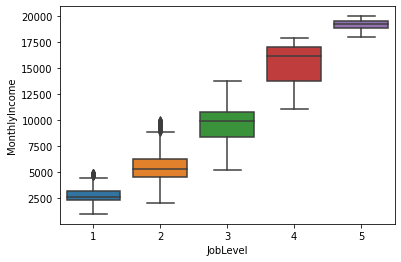

In [ ]:
sb.boxplot(x='JobLevel',y='MonthlyIncome',data = clean)

=> Boxplot across levels shows disparity in median income, and less overlap. 

In [ ]:
medians = clean.groupby(['JobLevel'])['MonthlyIncome'].median()
print(medians)

JobLevel
1     2670.0
2     5340.0
3     9980.0
4    16154.0
5    19232.0
Name: MonthlyIncome, dtype: float64


In [ ]:
clean['RelIncAtLev'] = 0;

for lev in clean['JobLevel'].unique():

  levdata = clean.loc[HR_data['JobLevel'] == lev]
  med = levdata['MonthlyIncome'].median() # calc median for the lev
  #print('at lev ', lev, ' median is ', med)
  
  clean.loc[clean['JobLevel'] == lev,'RelIncAtLev'] = clean['MonthlyIncome'] - med
  
  

In [ ]:
clean[['MonthlyIncome','JobLevel','RelIncAtLev']].head(10)

,MonthlyIncome,JobLevel,RelIncAtLev
0,5993,2,653.0
1,5130,2,-210.0
2,2090,1,-580.0
3,2909,1,239.0
4,3468,1,798.0
5,3068,1,398.0
6,2670,1,0.0
7,2693,1,23.0
8,9526,3,-454.0
9,5237,2,-103.0


b) JobSwitchRate: Looking at number of companies worked at with respect to total working years. Indicates the employee's preferance to switching jobs — some people are risk-aversive and stick to the same afe job, while others seek new opportunties.

In [ ]:
clean[['NumCompaniesWorked','TotalWorkingYears']].head(10)

,NumCompaniesWorked,TotalWorkingYears
0,8,8
1,1,10
2,6,7
3,1,8
4,9,6
5,0,8
6,4,12
7,1,1
8,0,10
9,6,17


In [ ]:
#clean['NumCompaniesWorked'] = clean['NumCompaniesWorked'] + 1
clean['JobSwitchRate'] = round(clean['NumCompaniesWorked']/ clean['TotalWorkingYears'],3)
clean[['NumCompaniesWorked','TotalWorkingYears','JobSwitchRate']].head(10)

,NumCompaniesWorked,TotalWorkingYears,JobSwitchRate
0,8,8,1.000
1,1,10,0.100
2,6,7,0.857
3,1,8,0.125
4,9,6,1.500
5,0,8,0.000
6,4,12,0.333
7,1,1,1.000
8,0,10,0.000
9,6,17,0.353


Creating a csv file for cleaned data:

In [ ]:
from google.colab import files
clean.to_csv('IBM.csv')
files.download('IBM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math 

In [ ]:
!pip install jupyter-dash

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  """


In [ ]:
def percent(str) : 
  level_list = list(HR_clean[str].unique())
  print("Attrition Rates per Level in {} :\n".format(str) )
  for i in range(len(level_list)): 
    count = 0
    total = 0
    for j in HR_clean['ID'] : 
      if (HR_clean[str][j] == level_list[i]) :
        total+=1
        if (HR_clean["Attrition"][j] == "Yes") : 
          count+=1
    print(' {} : "{}" %'.format(level_list[i] , round(count/total , 2)*100))
  print("--------------------------------------------------------------------------------\n")

In [ ]:
HR_clean = pd.read_csv("IBM.csv")

In [ ]:
HR_clean.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [ ]:
# Splitting numeric and categorical variables 
# Some categorical are missclassified as numerical
numeric = list(HR_clean.select_dtypes(include=np.number).columns)
numeric.remove("ID")
categorical = list(HR_clean.select_dtypes(include="object").columns)

[link text](https://)

---


# EDA Overview : 
1. Statistical Description of Numerical and Categorical variables
2. Attrition Value Imbalance 
3. Bi-Variate Exploration : HeatMap
4. Attrition and Categorical Values 
5. Attrition and Numerical Values 
6. JobSatisfaction and Attrition 
7. MonthlyIncome 
8. Age and Gender Statistics 


Mini EDA Questions :

1. Employee Stagnation 
2. Exploring Job Environment
3. Evaluation in a Work Space
4. Potential New Hiring 


---



---



## 1. Statistical Description of Numerical and Categorical variables

In [ ]:
HR_clean.columns

Index(['ID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'RelIncAtLev', 'JobSwitchRate'],
      dtype='object')

In [ ]:
#Description of Numeric Data (including some integer categorical data)
HR_clean[numeric].describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,RelIncAtLev,JobSwitchRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,29.229252,inf
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1306.211290,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-5051.000000,0.000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,-599.750000,0.100
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.200
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,733.250000,0.462
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4658.000000,inf


In [ ]:
#Description of categorical data 
HR_clean[categorical].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,2,2
top,No,Rare,RnD,Life Sciences,Male,Sales Executive,Single,No
freq,1233,1043,961,606,882,326,797,1054


## 2. Attrition Value Imbalance 

Exploring attrition rate in the whole data set, we observe the data is **imbalanced**.

Attrition=Yes has 237 data points **(16.12%)** while Attrition=NO has 1233 data points **(83.88%)**

[Text(0.5, 1.0, 'Attrition Count in Data')]

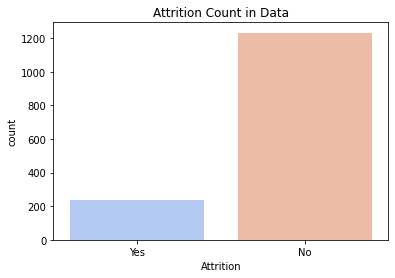

In [ ]:
sb.countplot(x = "Attrition" , data = HR_clean , palette = "coolwarm" ).set(title = "Attrition Count in Data")

In [ ]:
HR_clean.groupby("Attrition").describe()

ID                                                             \
            count        mean         std  min    25%    50%     75%     max   
Attrition                                                                      
No         1233.0  736.429035  427.408962  1.0  361.0  735.0  1113.0  1469.0   
Yes         237.0  724.464135  409.742866  0.0  385.0  732.0  1056.0  1461.0   

              Age             ... RelIncAtLev         JobSwitchRate           \
            count       mean  ...         75%     max         count mean std   
Attrition                     ...                                              
No         1233.0  37.561233  ...       781.0  4658.0        1233.0  inf NaN   
Yes         237.0  33.607595  ...       432.0  4567.0         237.0  inf NaN   

                                        
           min    25%    50%  75%  max  
Attrition                               
No         0.0  0.100  0.188  0.4  inf  
Yes        0.0  0.143  0.400  1.0  inf  

[2 rows x 192 columns]

In [ ]:
# moving the integer categorical variables to categorical list 
categorical.append("PerformanceRating")
numeric.remove("PerformanceRating")

categorical.append("Education")
numeric.remove("Education")

categorical.append("JobLevel")
numeric.remove("JobLevel")

##3. Bi-Variate Exploration using HeatMap between Numerical Data 

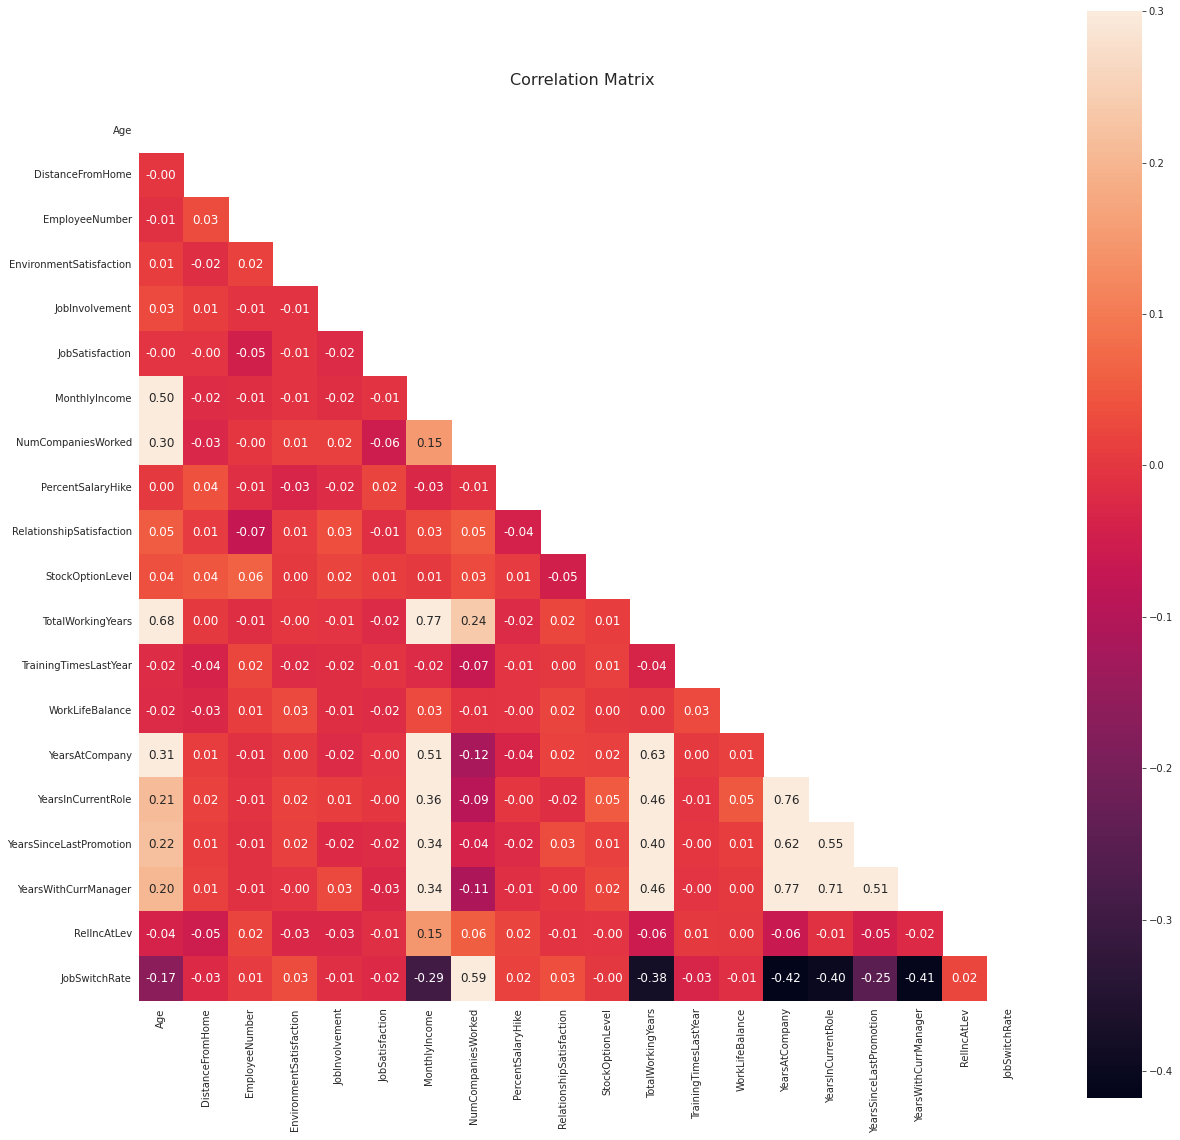

In [ ]:
corr = HR_clean[numeric].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sb.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax.set_title('Correlation Matrix \n', fontsize=16)
    ax = sb.heatmap(corr, mask=mask, vmax=.3, square=True ,annot=True , fmt='.2f', annot_kws={"fontsize":12})


#### Summary : 
1. High correlation between : 

  - total working years and age 
  - total working years and job level 
  - total working years and monthly income 

showing that the employees who have **worked longer have higher salaries and are in higher positions**.


2. High correlation between :
  - years at company and years since last promotion. 
  - job level and years since last promotion

Indicating that employee face **stagnation** after reaching a threshold number of years.Usually those in higher job level. To be explored further in exploration question.





## 4. Attrition and Categorical Values 

In [ ]:
#removing attrition from data set for plotting
categorical.remove("Attrition")
# fucntion for adding percentages to count plot 
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

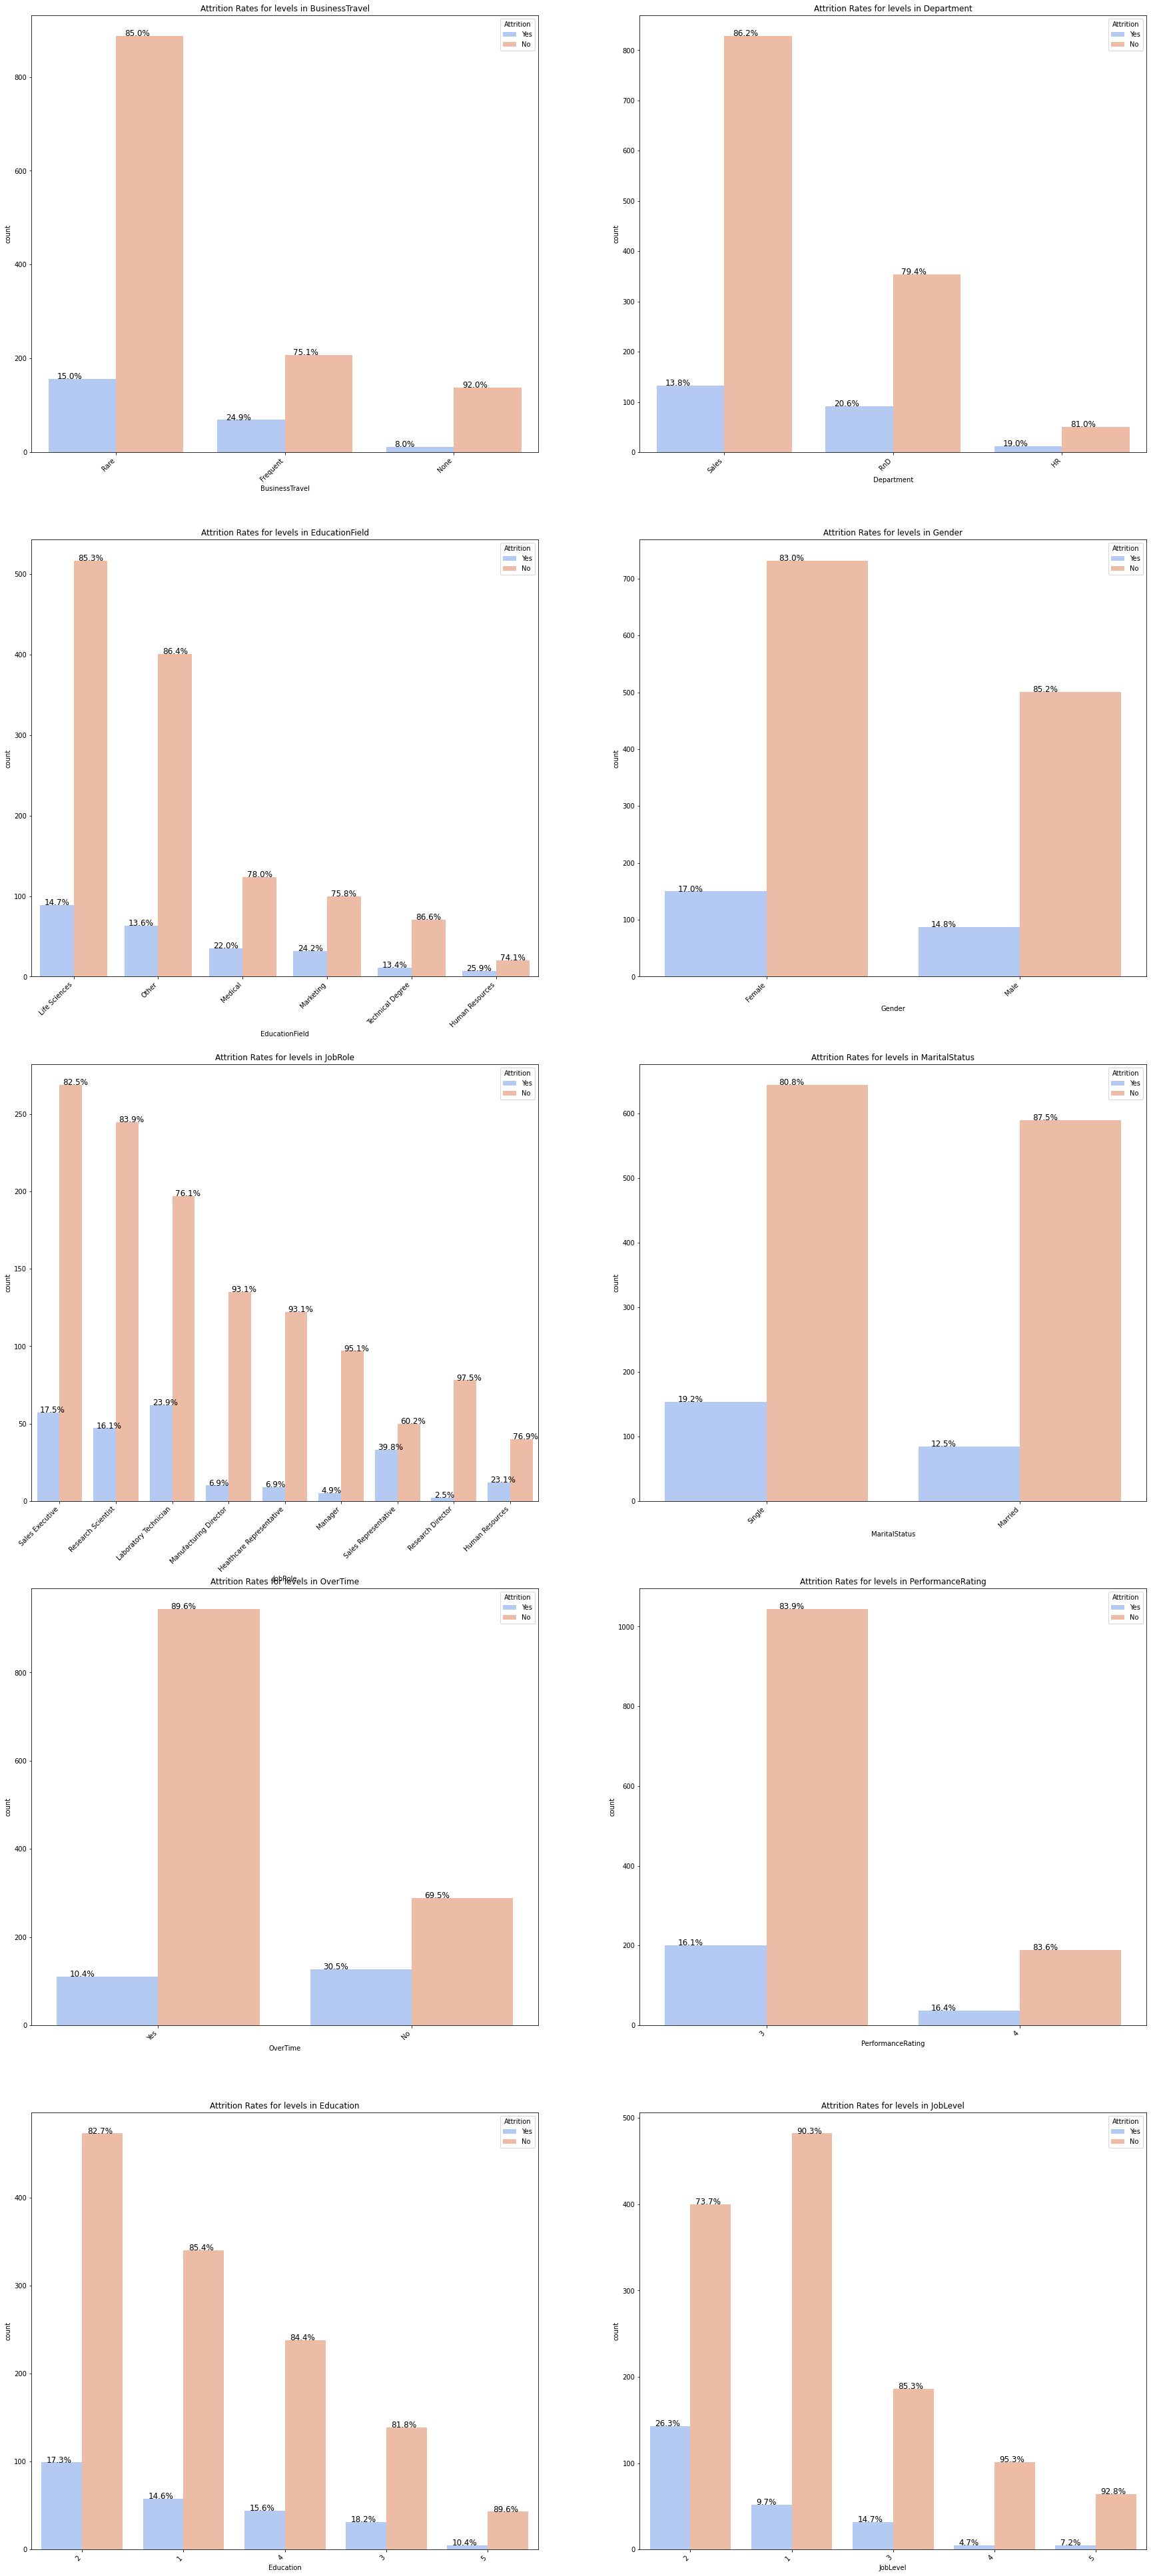

In [ ]:
fig, ax = plt.subplots(5,2, figsize = (30,70))

ax = np.ravel(ax)
for i in range(len(categorical)):
    sb.countplot(data = HR_clean, x = categorical[i], hue="Attrition", ax = ax[i], palette="coolwarm", order = HR_clean[categorical[i]].value_counts().index).set(title = "Attrition Rates for levels in {}".format(categorical[i]))
    ax[i].set_xticklabels(labels = HR_clean[categorical[i]].unique(), rotation=45, ha='right')
    with_hue(ax[i], HR_clean[categorical[i]], HR_clean[categorical[i]].nunique(),2)

In [ ]:
# appending attrition after plotting 
categorical.append("Attrition")

##### **Attrition Rates** for Categorical variables :


In [ ]:
percent("JobRole")
percent("Department")
percent("Gender")
percent("MaritalStatus")
percent("OverTime")
percent("BusinessTravel")

Attrition Rates per Level in JobRole :

 Sales Executive : "17.0" %
 Research Scientist : "16.0" %
 Laboratory Technician : "24.0" %
 Manufacturing Director : "7.000000000000001" %
 Healthcare Representative : "7.000000000000001" %
 Manager : "5.0" %
 Sales Representative : "40.0" %
 Research Director : "3.0" %
 Human Resources : "23.0" %
--------------------------------------------------------------------------------

Attrition Rates per Level in Department :

 Sales : "21.0" %
 RnD : "14.000000000000002" %
 HR : "19.0" %
--------------------------------------------------------------------------------

Attrition Rates per Level in Gender :

 Female : "15.0" %
 Male : "17.0" %
--------------------------------------------------------------------------------

Attrition Rates per Level in MaritalStatus :

 Single : "19.0" %
 Married : "12.0" %
--------------------------------------------------------------------------------

Attrition Rates per Level in OverTime :

 Yes : "31.0" %
 No : "1

### Summary : 
####  **Highest attrition Rates** across categorical variables 
- Department :**Sales** : 21% 
- EducationField :**HR** : 26%
- Gender : **Male** : 17%
- JobRole : **LabTechniacian** : 23% 
- MaritalStatus: **Single** : 19% 
- OverTime : **Yes** : 
- PerformanceRating : **Low and High equal** : 16%

####  **Lowest attrition Rates** across  categorical variables 
- Higher job levels & educational levels have lower attrition rate 
- BusinessTravel : **None : 8%**

## 5. Numerical and Attrition values 

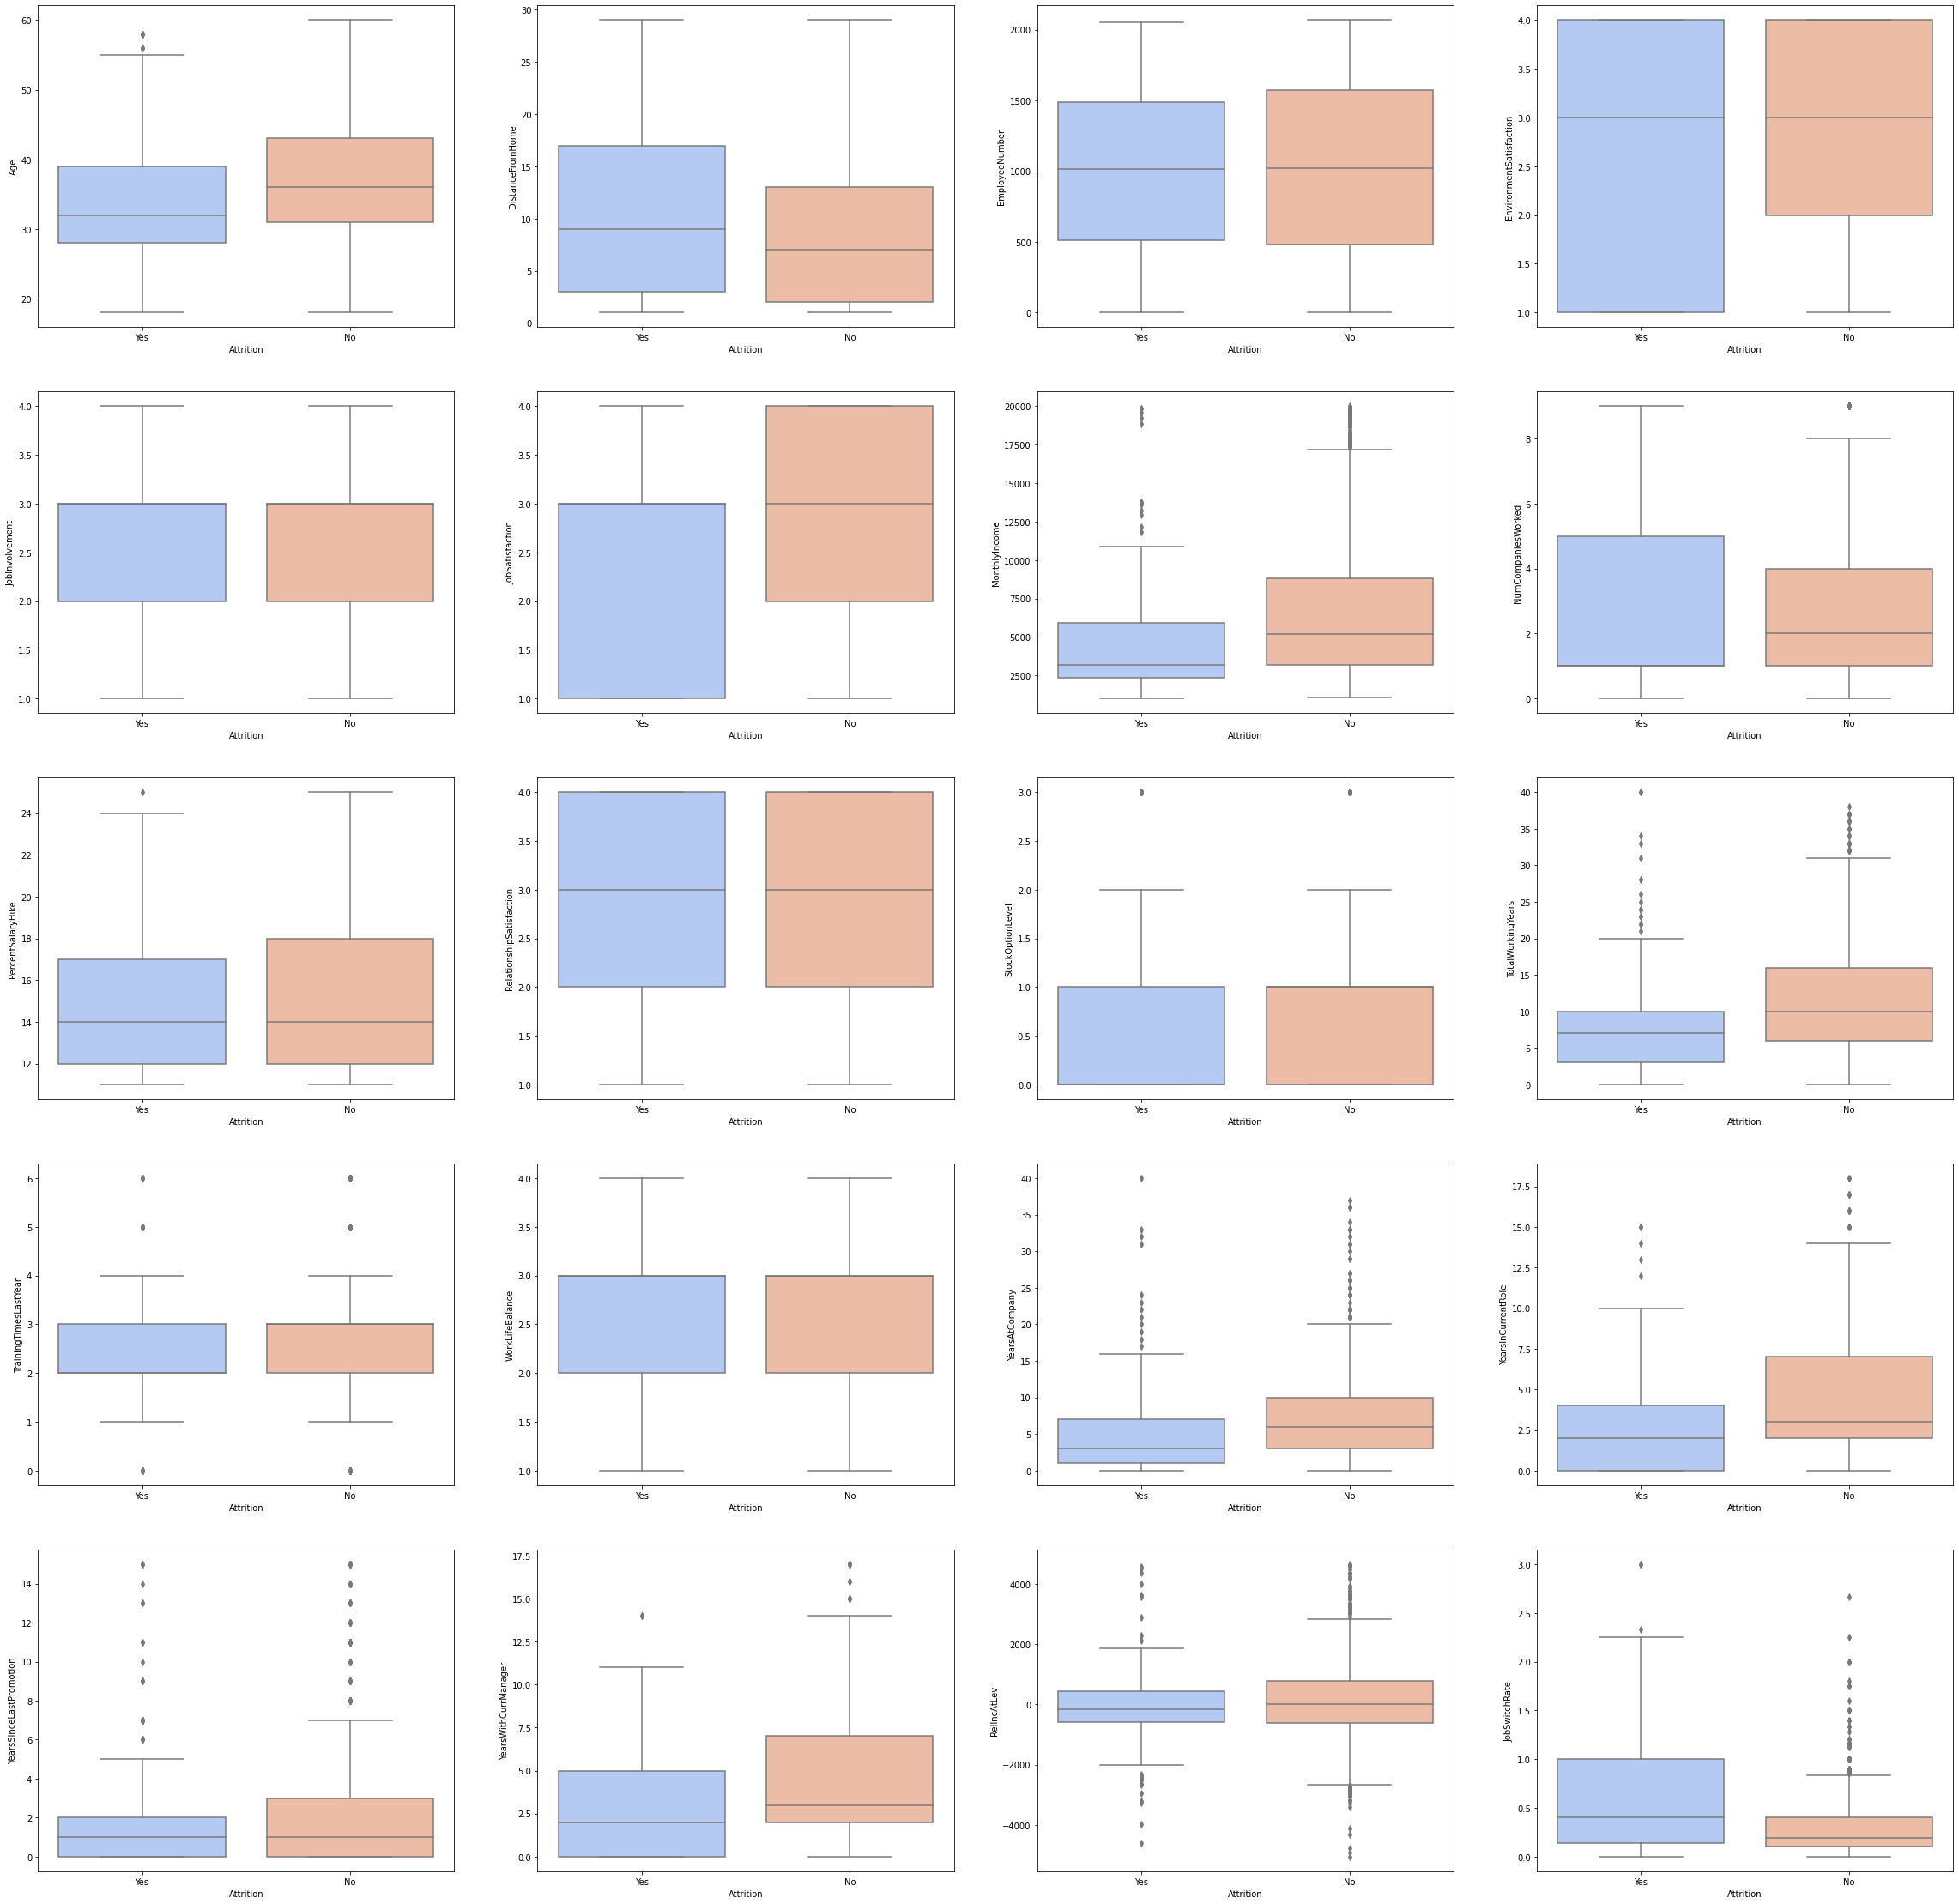

In [ ]:
fig, ax = plt.subplots(5,4, figsize = (40,40))
ax = np.ravel(ax)
for i in range(len(numeric)):
    sb.boxplot(data = HR_clean, y = numeric[i], x ="Attrition", ax = ax[i], palette = "coolwarm")


###Summary : 
#### Attrition is high for : 
- Lower JobSatisfaction 
- Higher JobSwitchRate 
- Lower YearsWithCurrentManager, YearsInCompany,totalWorkingYears  and Age  
- Lower JobLevels 
- Lower MonthlyIncome 

#### Variables that seem to have little effect on attrition :
- StockOptionLevel 
- employee number 
- trainingTimesSinceLastYear 
- RelationshipSatisfaction 


#### Inferences : 
- **Younger** employees and **newer** employees are more likely to leave. Perhaps for better job prospects.
- Employees at **lower JobLevels** and **lower income**  are more likely to leave. 
- JobSatisfaction show a strong relation with Attrition. Attrited employees have **lower JobSatisfaction**



## 6. JobSatisfaction & Attrition 

Atrrited Employees have lower JobSatisfaction thus examining JobSatisfaction at different levels will give us insight into problematic areas. 

Since heatmap shows no strong correlation between JobSatisfaction and numerical values,  looking at other categorical variables.

In [ ]:
fig = px.box(HR_clean, x = "PerformanceRating", y = "JobSatisfaction" ,  color = "Attrition", title = "Attrition for {} vs JobSatisfaction".format("PerformanceRating"))
fig.show()

In [ ]:
fig = px.box(HR_clean, x = "Department", y = "JobSatisfaction" ,  color = "Attrition", title = "Attrition for {} vs JobSatisfaction".format("Department"))
fig.show()

In [ ]:
fig = px.box(HR_clean, x = "BusinessTravel", y = "JobSatisfaction" ,  color = "Attrition", title = "Attrition for {} vs JobSatisfaction".format("BusinessTravel"))
fig.show()

In [ ]:
fig = px.box(HR_clean, x = "Gender", y = "JobSatisfaction" ,  color = "Attrition", title = "Attrition for {} vs JobSatisfaction".format("Gender"))
fig.show()

In [ ]:
fig = px.box(HR_clean, x = "JobLevel", y = "JobSatisfaction" ,  color = "Attrition", title = "Attrition for {} vs JobSatisfaction".format("JobLevel"))
fig.show()

###Summary 
- From the employers perspective the problem becomes clear, attrited employees with higher PerformanceRating had lower JobSatisfaction. 

- Between Departments HR and Sales have lower JobSatisfaction for Attrited employees while it is equally high for all non-Attrited employees. 

- Oddly for No OverTime and Rare BusinessTravel Employees had a lower JobSatisfaction median.

- Males who left have lower JobSatisfaction as compared to Females.  


- Across JobLevels, in lower JobLevel Attrited employees showed lower JobSatisfaction. 

- For Attrition=NO the JobSatisfaction has been consistently high across Categorical variables




##7. MonthlyIncome and Attrition 

##### Understanding MonthlyIncome in HR Data set : 
Monthly Income Statistics :

Which Levels has Highest and Lowest income? 



In [ ]:
print("Overall Average MonthlyIncome :\n" , HR_clean["MonthlyIncome"].mean())
print("\nAverage MonthlyIncome by : ")
print(HR_clean.groupby("Gender")["MonthlyIncome"].mean())
print("\nAverage MonthlyIncome by : ")
print(HR_clean.groupby("Department")["MonthlyIncome"].mean())
print("\nAverage MonthlyIncome by : ")
print(HR_clean.groupby("JobLevel")["MonthlyIncome"].mean())
print("\nAverage MonthlyIncome by : ")
print(HR_clean.groupby("JobRole")["MonthlyIncome"].mean())


Overall Average MonthlyIncome :
 6502.931292517007

Average MonthlyIncome by : 
Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

Average MonthlyIncome by : 
Department
HR       6654.507937
RnD      6281.252862
Sales    6959.172646
Name: MonthlyIncome, dtype: float64

Average MonthlyIncome by : 
JobLevel
1     2786.915285
2     5502.277154
3     9817.252294
4    15503.783019
5    19191.826087
Name: MonthlyIncome, dtype: float64

Average MonthlyIncome by : 
JobRole
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: MonthlyIncome, dtype: float64


In [ ]:
fig = px.box(HR_clean, x = "JobSatisfaction", y = "MonthlyIncome" ,  color = "Attrition", title = "Attrition for MonthlyIncome vs JobSatisfaction")
fig.show()

In [ ]:
fig = px.box(HR_clean, x = "JobLevel", y = "MonthlyIncome" ,  color = "Attrition", title = "Attrition for MonthlyIncome vs JobLevel")
fig.show()

### Summary :  
- Here we can see lower MonthlyIncome is a common trait in Mid-Level(JobLevel = 3/4) attrited employees. 
These are employees who probably have the experience and skill-set to find jobs elsewhere at higher pay. 
- On average :
  1. Women make more money than men 
  2. Sales Dapartment has highest salary 
  3. Income increases with JobLevel
  4. Research Directors and Managers make the most while Sales Representative make the least

- Lower MonthlyIncome is a clear reason behind Attrition while median is similar for attrited and non-attrited employees of different levels of JobSatisfaction.



## 8. Age 



Age distribution in data and between Genders 

[Text(0.5, 1.0, 'Age Distribution By Gender')]

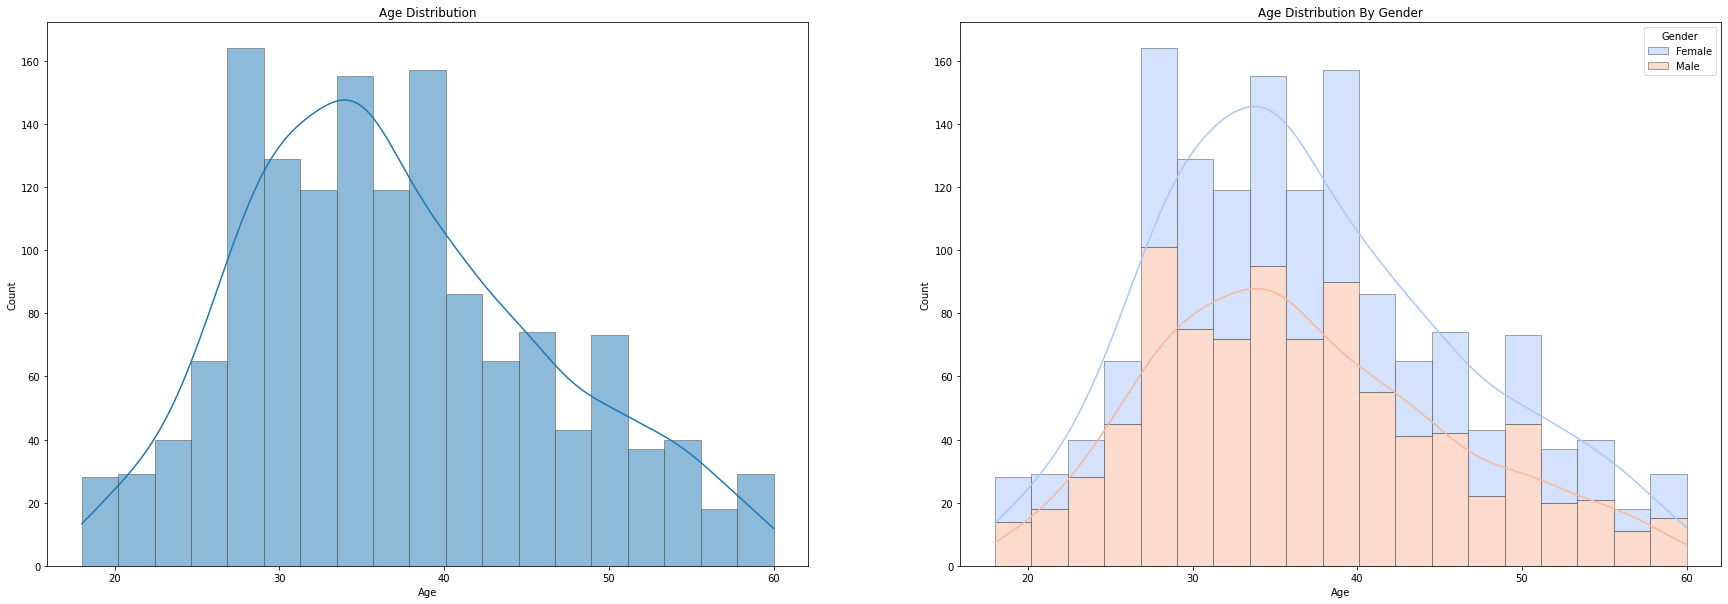

In [ ]:
fig , ax = plt.subplots(1,2, figsize = (30,10))
sb.histplot( HR_clean, x="Age",palette="coolwarm",edgecolor=".3", linewidth=.5, kde = True , ax = ax[0]).set(title = "Age Distribution")
sb.histplot( HR_clean, x="Age", hue="Gender", multiple="stack",palette="coolwarm",edgecolor=".3", linewidth=.5, kde = True , ax = ax[1]).set(title = "Age Distribution By Gender")

In [ ]:
print("Overall Average Age :\n" , HR_clean["Age"].mean())
print("\nAverage Age by : ")
print(HR_clean.groupby("Gender")["Age"].mean())
print("\nAverage Age by : ")
HR_clean.groupby("Department")["Age"].mean()

Overall Average Age :
 36.923809523809524

Average Age by : 
Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64

Average Age by : 


Department
HR       37.809524
RnD      37.042664
Sales    36.542601
Name: Age, dtype: float64

Examining JobSwitchRates :

**Are the older generation more likely to stay in the same company than the younger generation ?**

[Text(0.5, 1.0, 'JobSwitchRate vs Age')]

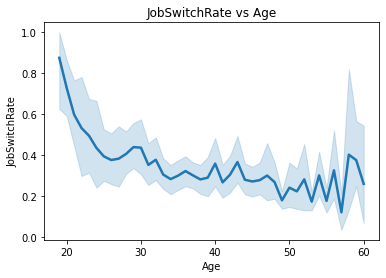

In [ ]:
sb.lineplot(x="Age", y="JobSwitchRate" , data= HR_clean , palette="tab10",linewidth=2.5).set(title="JobSwitchRate vs Age")

[Text(0.5, 1.0, 'JobSwitchRate Across Age in RnD')]

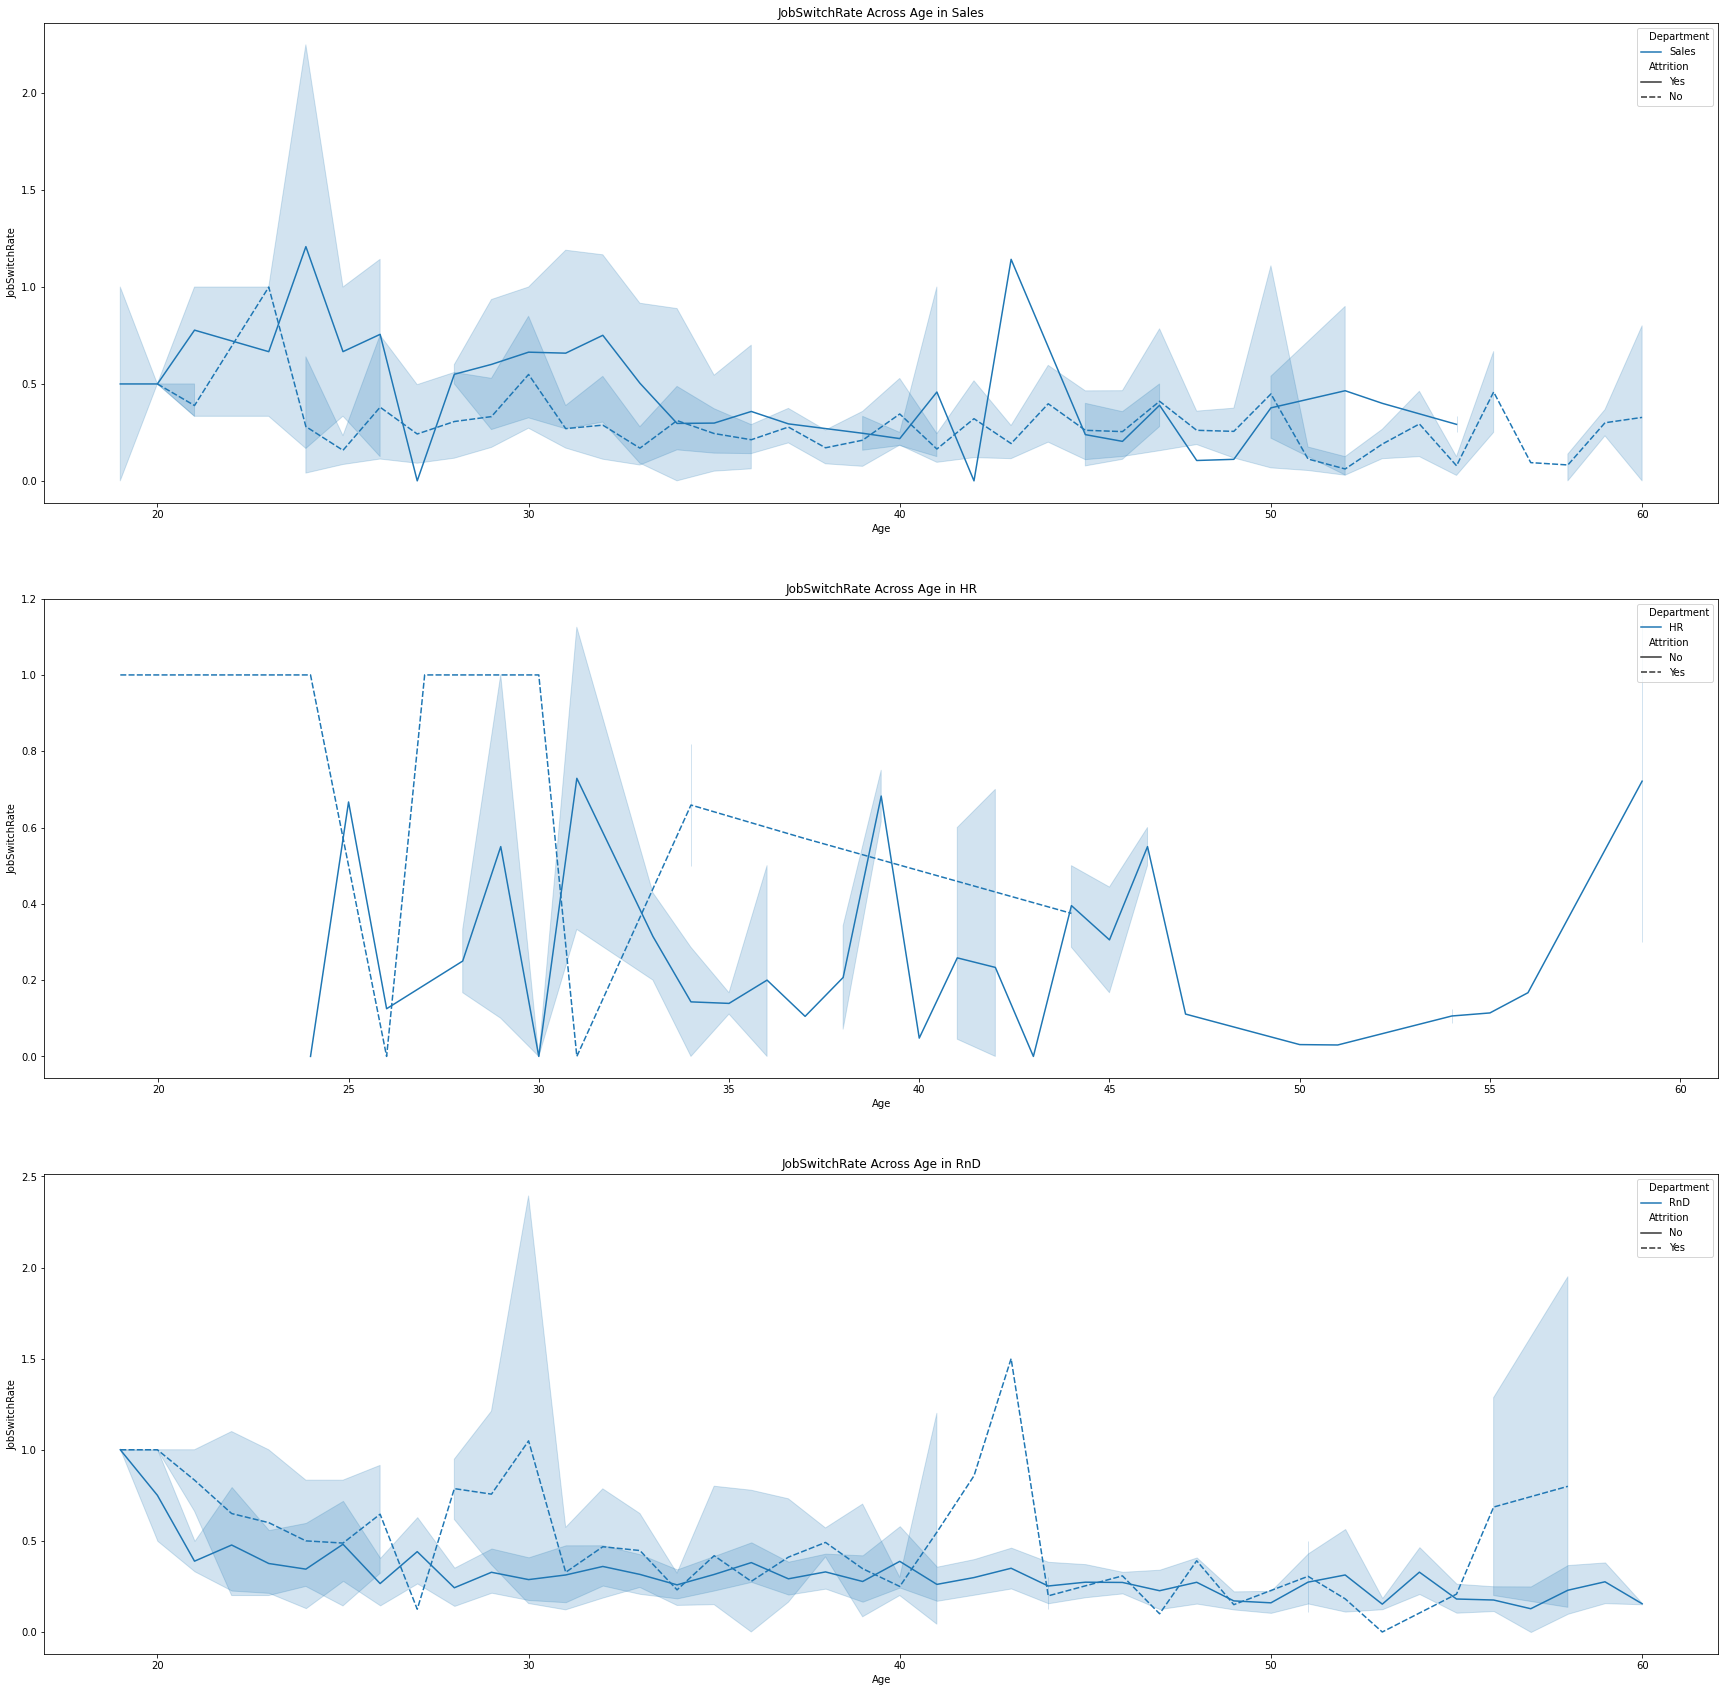

In [ ]:
fig , ax = plt.subplots(3,1, figsize = (30,30))
ax = np.ravel(ax)
sb.lineplot(
    data=HR_clean[HR_clean["Department"] == "Sales"],x="Age", y="JobSwitchRate", hue="Department", style="Attrition", ax=ax[0]
).set(title = "JobSwitchRate Across Age in Sales")
sb.lineplot(
    data=HR_clean[HR_clean["Department"] == "HR"],x="Age", y="JobSwitchRate", hue="Department", style="Attrition", ax=ax[1]
).set(title = "JobSwitchRate Across Age in HR") # estimator = None
sb.lineplot(
    data=HR_clean[HR_clean["Department"] == "RnD"],x="Age", y="JobSwitchRate", hue="Department", style="Attrition", ax=ax[2]
).set(title = "JobSwitchRate Across Age in RnD")




### Summary : 
- The **average age** for data set is around **37**
- In all three department employees between the age of **25 to 35** have a general **highest switch rates** for both Attrition=Yes and Attrition=No. Yes, the younger generation are the ones switching jobs more often and thus more likely to leave. 


- But overall there is little difference in the JobSwitchRates between the attrited and non attrited employees in each Department. 


## 9. Gender Statistics :
Examining Gender Ratio

In [ ]:
fig = px.pie(HR_clean, names='Gender', title='Gender Proportion')
fig.show()

In [ ]:
fig = px.histogram(HR_clean, x="JobLevel",
             color='Gender', barmode='group',
             height=400, text_auto = ".2s" , title = "Gender Count at Job Levels")
fig.show()

In [ ]:
fig = px.histogram(HR_clean, x="Department",
             color='Gender', barmode='group',
             height=400, text_auto = ".2s" , title = "Gender Count in Departments")
fig.show()

In [ ]:
fig = px.box(HR_clean, x="Gender", y = "MonthlyIncome",
             title = "Gender vs MonthyIncome")
fig.show()

### Summary 
- The Female Employee count is lower across Departments and JobLevels 
- Women Earn more than Men



---



---

# Mini EDA Questions

In [ ]:
data = pd.read_csv("IBM.csv")
plt.rc("axes.spines", bottom=False, left=False, top=False, right=False)
#sb.set_palette("Paired")

**Note - Visualisation Choices in the following Section:**


*   Concept used is **Data-ink ratio** (from LAMS)
*   Do away with plot spines, as they convey little information and were not required for interpretation.
*   Use default colour pallette as it represents the categorical destictions well.
*   Subplots to convey one cohesive idea.
*   Certain subplots have whitegrid and shared axis to make clearer comparison for feature.







## Exploration Question 1:
What is stagnation for an employee? Does it lead to an employee quitting? 


---



**Hypothesis - Job Stagnation : halted career growth leads to quitting the job.**

Variables indicating stagnation: 
low  PercentSalaryHike, high YearsSincePromotion, 
high YearsWithCurrent manager

####Examining salary hike:


*   Is it related to YearsSinceLastPromotion 

  If how recent a promotion was influences the salary hike -> take this into account for stagnation.

*   How does it vary across JobLevel

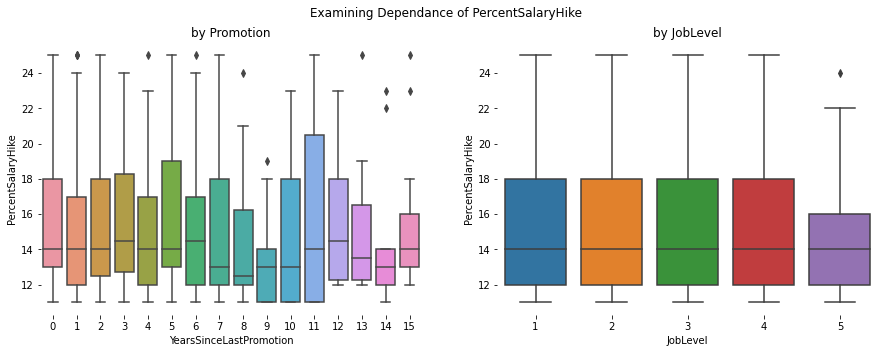

In [ ]:
fig, axes = plt.subplots(1, 2 , figsize=(15,5))
fig.suptitle('Examining Dependance of PercentSalaryHike')

axes[0].set_title('by Promotion')
sb.boxplot(x='YearsSinceLastPromotion',y='PercentSalaryHike',data = data, ax = axes[0])

axes[1].set_title('by JobLevel')
sb.boxplot(x='JobLevel',y='PercentSalaryHike', data = data, ax=axes[1])

Inference: 

*   How recent a promotion was does not affect salary hike. 
*   SalaryHike ranges similarly across JobLevel, except a minor difference for highest level, at which point the employee's income may 'saturate.'

###Defining and Examining Stagnantion:

In [ ]:
# intializing new columns to define stagnation
data['RelSalaryHike'] = 0;
data['RecentPromotion'] = 0;
data['NewManager'] = 0;

# defining values for each employee relative to their peers at that joblevel
for lev in data['JobLevel'].unique():
  levdata = data.loc[data['JobLevel'] == lev]
  
  med = levdata['PercentSalaryHike'].median() # calc median for the lev
  data.loc[data['JobLevel'] == lev,'RelSalaryHike'] = data['PercentSalaryHike'] - med 

  med2 = levdata['YearsWithCurrManager'].median() # calc median for the lev
  data.loc[data['JobLevel'] == lev,'NewManager'] = data['YearsWithCurrManager'] - med2

  med3 = levdata['YearsSinceLastPromotion'].median() # calc median for the lev
  data.loc[data['JobLevel'] == lev,'RecentPromotion'] = data['YearsSinceLastPromotion'] - med3

# re-naming and re-aligning values for convenience

data.loc[data['RelSalaryHike'] < 0,'RelSalaryHike'] = 'Low'
data.loc[data['RelSalaryHike'] != 'Low','RelSalaryHike'] = 'High'

data.loc[data['NewManager'] <= 0,'NewManager'] = 'Y'
data.loc[data['NewManager'] != 'Y','NewManager'] = 'N'

data.loc[data['RecentPromotion'] <= 0,'RecentPromotion'] = 'Y'
data.loc[data['RecentPromotion'] != 'Y','RecentPromotion'] = 'N'

#checking newly defined columns
data[['JobLevel','PercentSalaryHike','RelSalaryHike', 'YearsWithCurrManager','NewManager', 'YearsSinceLastPromotion', 'RecentPromotion']].head(10)

,JobLevel,PercentSalaryHike,RelSalaryHike,YearsWithCurrManager,NewManager,YearsSinceLastPromotion,RecentPromotion
0,2,11,Low,5,N,0,Y
1,2,23,High,7,N,1,Y
2,1,15,High,0,Y,0,Y
3,1,11,Low,0,Y,3,N
4,1,12,Low,2,Y,2,N
5,1,13,Low,6,N,3,N
6,1,20,High,0,Y,0,Y
7,1,22,High,0,Y,0,Y
8,3,21,High,8,N,1,Y
9,2,13,Low,7,N,7,N


**Stagnant variable defined according to these new values:**

In [ ]:
data['Stagnant'] = 0;
data.loc[data['NewManager'] == 'Y','Stagnant'] = 'No'
data.loc[data['RecentPromotion'] == 'Y','Stagnant'] = 'No'
data.loc[data['RelSalaryHike'] == 'High','Stagnant'] = 'No'
data.loc[data['Stagnant'] != 'No','Stagnant'] = 'Yes'

data['Stagnant'].value_counts()

No     1349
Yes     121
Name: Stagnant, dtype: int64

In [ ]:
#Attrition rates with respect to stagnantion as defined
temp = data.loc[data['Stagnant'] == 'Yes']
total = len(temp.index) #number of stagnant employees
temp = temp.loc[temp['Attrition'] == 'Yes']
n = len(temp.index) #number of subset with attrition Yes
percent = round((n*100/total),2)
print('Attrition rate for stagnant employees is: ', percent, '%')

temp = data.loc[data['Stagnant'] == 'No']
total = len(temp.index) #number of non-stagnant employees
temp = temp.loc[temp['Attrition'] == 'Yes']
n = len(temp.index) #number of subset with attrition Yes
percent = round((n*100/total),2)
print('Attrition rate for non-stagnant employees is:', percent, '%')

Attrition rate for stagnant employees is:  14.88 %
Attrition rate for non-stagnant employees is: 16.23 %


**Inference**

As the attrition rate for non-stagnant employees is higher, it cannot be concluded that employees in the same job for many years are likely to leave.

Examining other variables for stagnant employees:

In [ ]:
stagnant = data[data['Stagnant'] == 'Yes']
stagnant.shape

(121, 36)

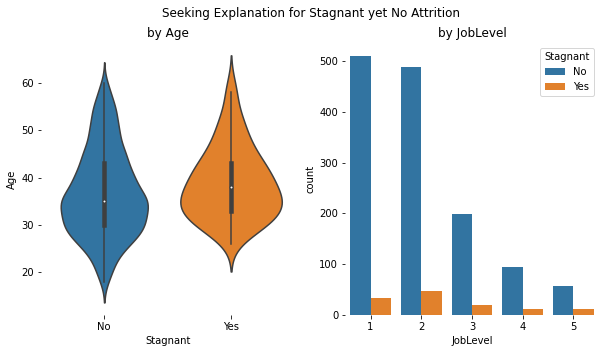

In [ ]:
fig, axes = plt.subplots(1, 2 , figsize=(10,5))
fig.suptitle('Seeking Explanation for Stagnant yet No Attrition')

axes[0].set_title('by Age')
sb.violinplot(x='Stagnant', y='Age', data = data, ax = axes[0])

axes[1].set_title('by JobLevel')
sb.countplot(x='JobLevel', hue='Stagnant', data = data, ax = axes[1])

**Inference:**

* Age for stagnant employees ranges above that of non-satgnant ones.

* The ratio of Yes:No stagnation increases with JobLevel.

* Above plot suggests that 'stagnation' can be interpretted as 'settling' once they reach a higher job level and age; as opposed to halted career growth.








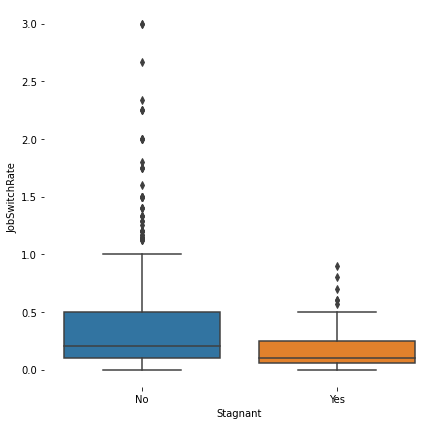

In [ ]:
fig, axes = plt.subplots(1, 1 , figsize=(7,7))
sb.boxplot(x='Stagnant',y='JobSwitchRate', data = data, ax=axes)

=> This further shows that 'stagnant' employees have an inclination to stick to their jobs (in there overall career - not just at IBM.)

### Summary :
Suggestion: re-shuffling and reording of employee roles at IBM will have little impact on reducing attrition. 

Contrary to intuition, people (as per this dataset) do not leave jobs simply beacuse of feeling 'stuck' in their role, so long as they are satisfied with it.

---





---

##Exploration Question 2: A closer look at immediate Job Environment

Focus on impact of relationship and environment satisfaction on attrition:
---
Does the specific team the employee is in have major impact on attrition? Indicated by relationship satisfaction, environment satisfaction, and new manager.

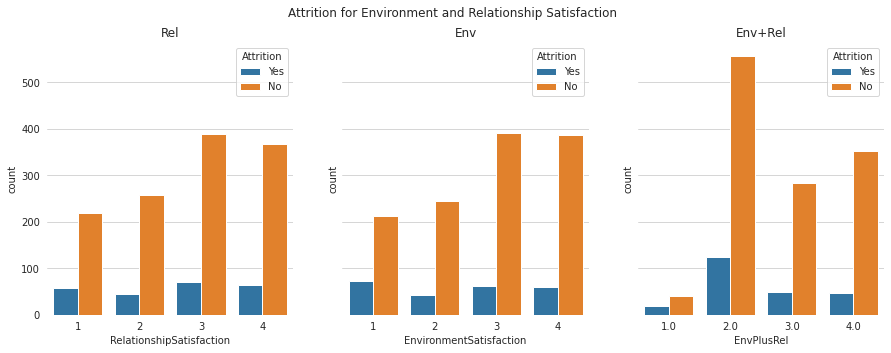

In [ ]:
with sb.axes_style("whitegrid"):
    fig, axes = plt.subplots(1, 3 , figsize=(15,5), sharey=True)
    fig.suptitle('Attrition for Environment and Relationship Satisfaction')

    axes[0].set_title('Rel')
    sb.countplot(x='RelationshipSatisfaction', hue='Attrition', data = data, ax = axes[0])
    sb.despine(left=True, bottom=True)
    
    axes[1].set_title('Env')
    sb.countplot(x='EnvironmentSatisfaction', hue='Attrition', data = data, ax=axes[1])
    #sb.despine(left=True)
    
    data['EnvPlusRel'] = round((data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction'])/2,0)
    axes[2].set_title('Env+Rel')
    sb.countplot(x='EnvPlusRel', hue='Attrition', data = data, ax=axes[2])
    #sb.despine(left=True)

=> It is clear that Environment and Relationship satsisfaction combined together are more useful in identifying at risk employees — nearly half of those with Environment+Relationship satisfaction <= 2 leave.  

**Recommendation:**

(1)Frequent surveys from employees, and taking their inputs to improve experience for them. 

(2) When making key decisions such as who to promote or give responsibility for a longterm project, use their ratings to remove risky choices

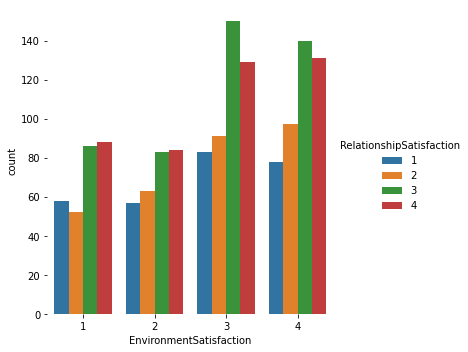

In [ ]:
atrisk = data[data['EnvPlusRel']==1.0]
sb.catplot(x='EnvironmentSatisfaction', hue='RelationshipSatisfaction', kind="count", data = data)
sb.despine(left=True, bottom=True)

=> There is not necessarily an overlap in relationship and environment satisfaction values; i.e. an employee that rates one low may have a high rating for the other. So, combined value is necessary.

In [ ]:
atrisk.shape

(58, 37)

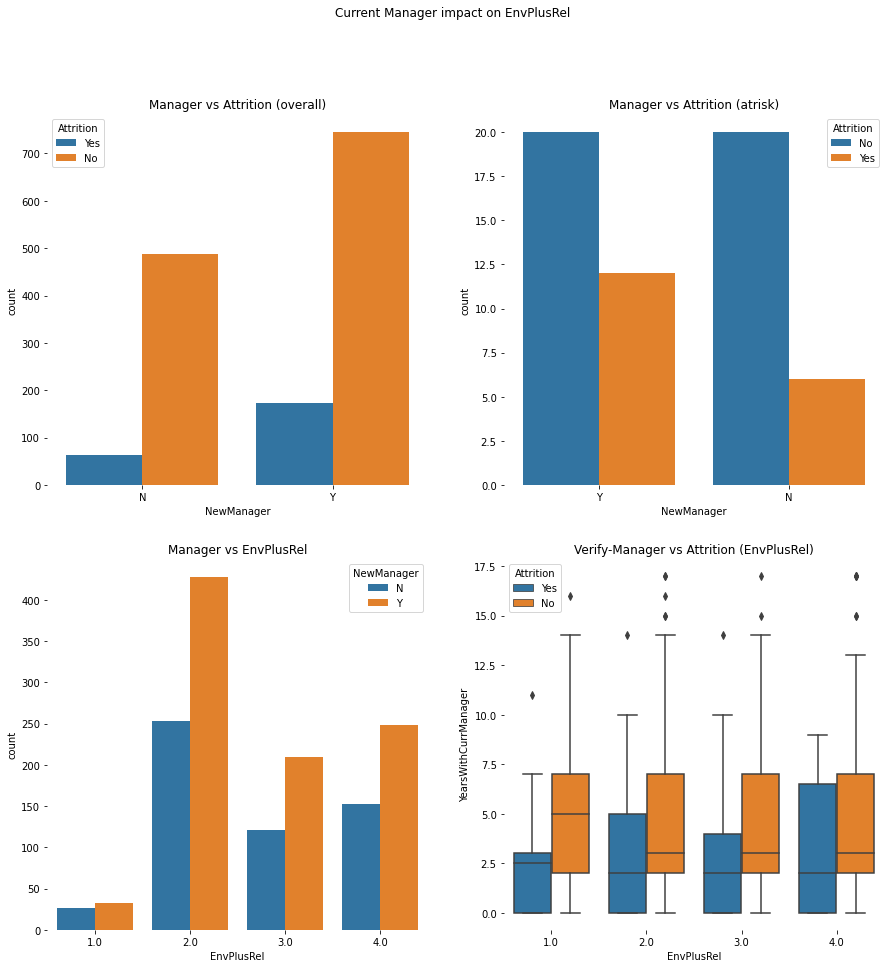

In [ ]:
fig, axes = plt.subplots(2, 2 , figsize=(15,15))
fig.suptitle('Current Manager impact on EnvPlusRel')

axes[0][0].set_title('Manager vs Attrition (overall)')
sb.countplot(x='NewManager', hue='Attrition', data = data, ax = axes[0][0])
#sb.boxplot(x='Attrition',y='YearsWithCurrManager', data = data, ax=axes[0][0])

axes[0][1].set_title('Manager vs Attrition (atrisk)')
sb.countplot(x='NewManager', hue='Attrition', data = atrisk, ax = axes[0][1])
#sb.boxplot(x='Attrition',y='YearsWithCurrManager', data = atrisk, ax=axes[0][1])

axes[1][0].set_title('Manager vs EnvPlusRel')
sb.countplot(x='EnvPlusRel', hue='NewManager', data = data, ax=axes[1][0])

axes[1][1].set_title('Verify-Manager vs Attrition (EnvPlusRel)')
sb.boxplot(x='EnvPlusRel',y='YearsWithCurrManager',hue = 'Attrition', data = data, ax=axes[1][1])

**Inference:**
*  Because of (a) Limited data for atrisk employees and (b)disproportionate number of people with new managers

*  A low EnvPlusRel **can not** merely be attributed to the employees current team, and can thus be solved by shuffling teams. A low value is indicative of experience at IBM in general. 

* Irrespective of EnvPlusRel satisfaction, attrition is higher for those with newer managers.






---





---


## Exploration Question 3: Evaluation in a WorkSpace

Focus on overall ratings
---

In [ ]:
rate = data[['Attrition','PerformanceRating', 'JobInvolvement','JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance']]
#value_counts for all except Attrition 
rate[['PerformanceRating', 'JobInvolvement','JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance']].apply(pd.Series.value_counts)

,PerformanceRating,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance
1,NaN,83,289,284,276,80
2,NaN,375,280,287,303,344
3,1244.0,868,442,453,459,893
4,226.0,144,459,446,432,153


Metrics from employer's side:

In [ ]:
#re-scaling PerformanceRating and JobInvolvement
rate['PerformanceRating'] = rate['PerformanceRating'] - 2
rate['PerformanceRating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    1244
2     226
Name: PerformanceRating, dtype: int64

In [ ]:
rate.loc[rate['JobInvolvement'] == 2,'JobInvolvement'] = 1
#rate['JobInvolvement'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#separate cell to avoid issue with order of calculation
rate.loc[rate['JobInvolvement'] == 3,'JobInvolvement'] = 2
rate.loc[rate['JobInvolvement'] == 4,'JobInvolvement'] = 2
#rate['JobInvolvement'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rate['EmployerRating'] = rate['PerformanceRating'] + rate['JobInvolvement'] - 1
rate[['PerformanceRating', 'JobInvolvement','EmployerRating']].apply(pd.Series.value_counts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PerformanceRating,JobInvolvement,EmployerRating
1,1244.0,458.0,383
2,226.0,1012.0,936
3,NaN,NaN,151


Metrics from employee's side:

In [ ]:
#rate['EmployeeRating'] = round((data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction'] + data['JobSatisfaction'] + data['WorkLifeBalance'])/4,0)
rate['EmployeeRating'] = data['EnvironmentSatisfaction'] + data['RelationshipSatisfaction'] + data['JobSatisfaction'] + data['WorkLifeBalance'] - 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rate[['JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance','EmployeeRating']].apply(pd.Series.value_counts)

,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,EmployeeRating
1,289.0,284.0,276.0,80.0,1
2,280.0,287.0,303.0,344.0,6
3,442.0,453.0,459.0,893.0,23
4,459.0,446.0,432.0,153.0,38
5,NaN,NaN,NaN,NaN,98
6,NaN,NaN,NaN,NaN,196
7,NaN,NaN,NaN,NaN,239
8,NaN,NaN,NaN,NaN,272
9,NaN,NaN,NaN,NaN,265
10,NaN,NaN,NaN,NaN,185


Examining Employer and Employee ratings side-by-side:

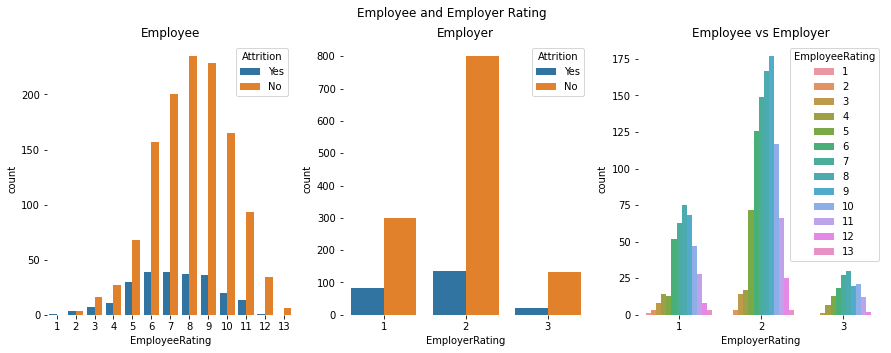

In [ ]:
fig, axes = plt.subplots(1, 3 , figsize=(15,5))
fig.suptitle('Employee and Employer Rating')

axes[0].set_title('Employee')
sb.countplot(x='EmployeeRating', hue='Attrition', data = rate, ax = axes[0])

axes[1].set_title('Employer')
sb.countplot(x='EmployerRating', hue='Attrition', data = rate, ax=axes[1])

axes[2].set_title('Employee vs Employer')
sb.countplot(x='EmployerRating', hue='EmployeeRating', data = rate, ax=axes[2])

=> In the right-most graph, since the distribution of employee rating is near identical, irrespective of employer rating, they are independent and not correlated to each other.

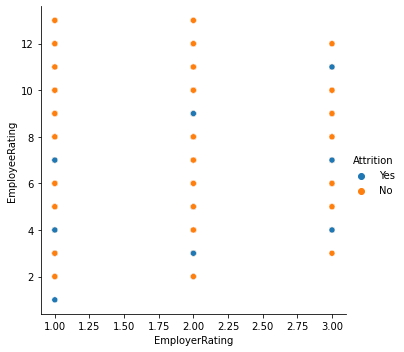

In [ ]:
sb.relplot(data = rate, x="EmployerRating", y="EmployeeRating", hue="Attrition", kind="scatter")

**Inference:**

Attrition values Yes follow a pattern - points can nearly be connected in 3 blue lines above^. Employer rating is lower in proportion to employee rating.

**Significant Consequence:**

Risk of well-rated employees leaving, as they rate the company lower.

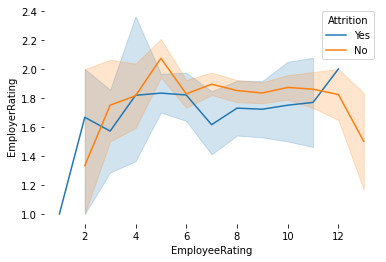

In [ ]:
sb.lineplot(data=rate, x="EmployeeRating", y="EmployerRating", hue="Attrition")



---



---

##Exploration Question 4: Potential New Hiring

Focus on OverTime and Attrition
---
**Hypothesis: Hiring new people according to JobRole would reduce work load per employee**

In [ ]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
data.loc[data['JobRole'] == 'Sales Executive','JobRole'] = 'SE'
data.loc[data['JobRole'] == 'Research Scientist','JobRole'] = 'RS'
data.loc[data['JobRole'] == 'Laboratory Technician','JobRole'] = 'LT'
data.loc[data['JobRole'] == 'Manufacturing Director','JobRole'] = 'MD'
data.loc[data['JobRole'] == 'Healthcare Representative','JobRole'] = 'Hl'
data.loc[data['JobRole'] == 'Manager','JobRole'] = 'M'
data.loc[data['JobRole'] == 'Sales Representative','JobRole'] = 'SR'
data.loc[data['JobRole'] == 'Research Director','JobRole'] = 'RD'
data.loc[data['JobRole'] == 'Human Resources','JobRole'] = 'HR'

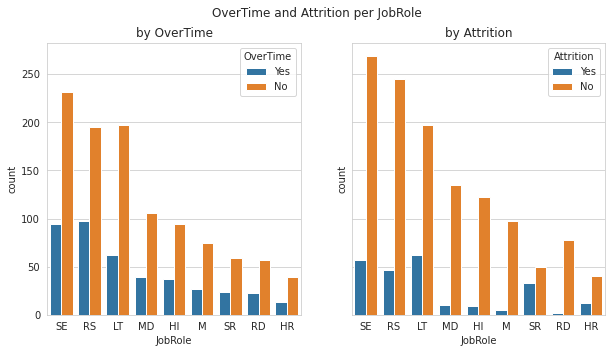

In [ ]:
with sb.axes_style("whitegrid"):
  fig, axes = plt.subplots(1, 2 , figsize=(10,5), sharey = True)
  fig.suptitle('OverTime and Attrition per JobRole')

  axes[0].set_title('by OverTime')
  sb.countplot(x='JobRole', hue='OverTime',  data = data, ax = axes[0])

  axes[1].set_title('by Attrition')
  sb.countplot(x='JobRole', hue='Attrition', data = data, ax=axes[1])

=> Clear relation between Attrition and OverTime as per JobRole.

**Recommendation:**

new hires in target job role to distribute workload per employee, thus reducingovertime and attrition rate.

As per earlier calculation of attrition rate per Job Role (and the corresponding plot)

Sales Executive, Laboratory Technician, and Human Resources have the highest attrition rate.

Therefore, these roles should be targetted for new hiring.



---

